In [32]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
data = pd.read_csv('/content/adult-data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               32561 non-null  int64 
 1   workclass         32561 non-null  object
 2   fnlwgt            32561 non-null  int64 
 3   education         32561 non-null  object
 4   education_num     32561 non-null  int64 
 5   marital_status    32561 non-null  object
 6   occupation        32561 non-null  object
 7   relationship      32561 non-null  object
 8   race              32561 non-null  object
 9   sex               32561 non-null  object
 10  capital-gain      32561 non-null  int64 
 11  capital-loss      32561 non-null  int64 
 12  wrk_hrs_per_week  32561 non-null  int64 
 13  native_country    32561 non-null  object
 14  income            32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


income: >50K, <=50K.

age: continuous.

workclass: Private, Self-emp-not-inc (incorporated), Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous (the number of units in the target population that the responding unit represents.).

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous (number of years of education in total).

marital-status: Married-civ (civilian)-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF(armed forces)-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous (income from investment sources other than wage/salary.).

capital-loss: continuous (loss from investment sources other than wage/salary.).

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

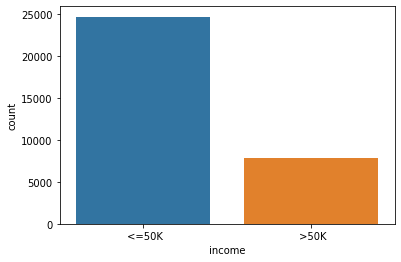

In [5]:
# check if the dataset is balanced
sns.countplot(x='income',data=data)

In [6]:
# let's check the null values
data.isnull().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
wrk_hrs_per_week    0
native_country      0
income              0
dtype: int64

In [7]:
# describe the data to see if max and min make sense
data.describe()

,age,fnlwgt,education_num,capital-gain,capital-loss,wrk_hrs_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
# education-num and education has similar meaning
# For simplicity, I will remove education (good example where you may delete 
# similar features )
data.drop(columns="education",inplace=True)

In [9]:
#The weighting factor (fnlwgt) can be discarded since it does not provide useful 
#information about the person
data.drop(columns="fnlwgt",inplace=True)

In [11]:
# marital_status can also be discarded since we know the sex and relationship
data.drop(columns="marital_status",inplace=True)

In [12]:
# Let's check native_country since it has many values
data['native_country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [13]:
# the majority are from one courntry (united states). This field will not be
# very useful in the analysis 
data.drop(columns="native_country",inplace=True)

In [14]:
data.head() 

,age,workclass,education_num,occupation,relationship,race,sex,capital-gain,capital-loss,wrk_hrs_per_week,income
0,39,State-gov,13,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,13,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,38,Private,9,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,53,Private,7,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
4,28,Private,13,Prof-specialty,Wife,Black,Female,0,0,40,<=50K


In [15]:
#test data
df_test = pd.read_csv("/content/adult-test.csv")
df_test.drop(columns=["education","fnlwgt","marital_status","native_country"],inplace=True)

In [24]:
X_train = data.iloc[:,:-1]
y_train = data.iloc[:,-1]
label_enc = LabelEncoder()
y_train = label_enc.fit_transform(y_train)
X_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1]
y_test = label_enc.transform(y_test)

In [27]:
categorical_vars=["workclass","relationship", "occupation","race", "sex"]
quantitative_vars =["age","education_num","capital-gain","capital-loss","wrk_hrs_per_week"]
ohe = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', ohe, categorical_vars)],
        remainder="passthrough")
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

In [30]:
clf = RandomForestClassifier()
clf.fit(X_train_encoded, y_train)
y_pred_train = clf.predict(X_train_encoded)
print("Training Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
y_pred_test = clf.predict(X_test_encoded)
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred_test))

Training Accuracy: 0.9735266115905531
Test Accuracy: 0.8471838339168356


In [34]:
clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.9, max_depth=1, random_state=0)
clf2.fit(X_train_encoded, y_train)
y_pred_train = clf2.predict(X_train_encoded)
print("Training Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
y_pred_test = clf2.predict(X_test_encoded)
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred_test))

Training Accuracy: 0.8663124596910414
Test Accuracy: 0.8656716417910447


# Regression

In [40]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
boston_dataset = load_boston()
boston_dataset

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [37]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [38]:
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [41]:
X = boston.iloc[:,:-1]
Y = boston.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=5)

In [42]:
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.8, max_depth=1, random_state=0)
gb_reg.fit(X_train, Y_train)
y_pred_train = gb_reg.predict(X_train)
print( r2_score(Y_train, y_pred_train))
y_pred_test = gb_reg.predict(X_test)
print(r2_score(Y_test, y_pred_test))

0.9488716649137519
0.807126497720021
